In [ ]:
#Predicción de la eficiencia energética de los edificios (aprendizaje supervisado)

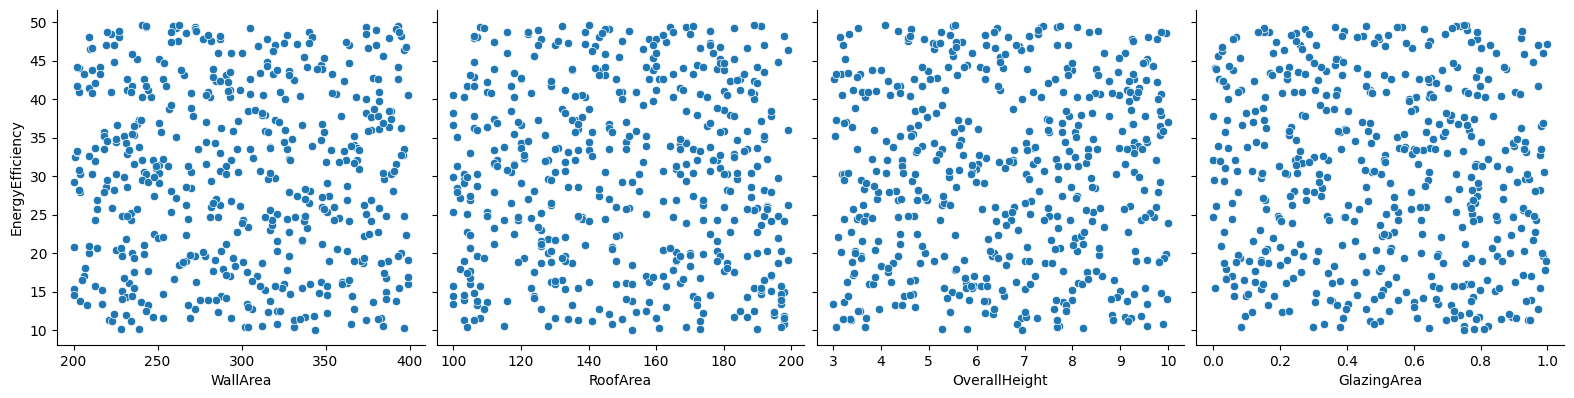

Mean Squared Error: 146.02051889440582


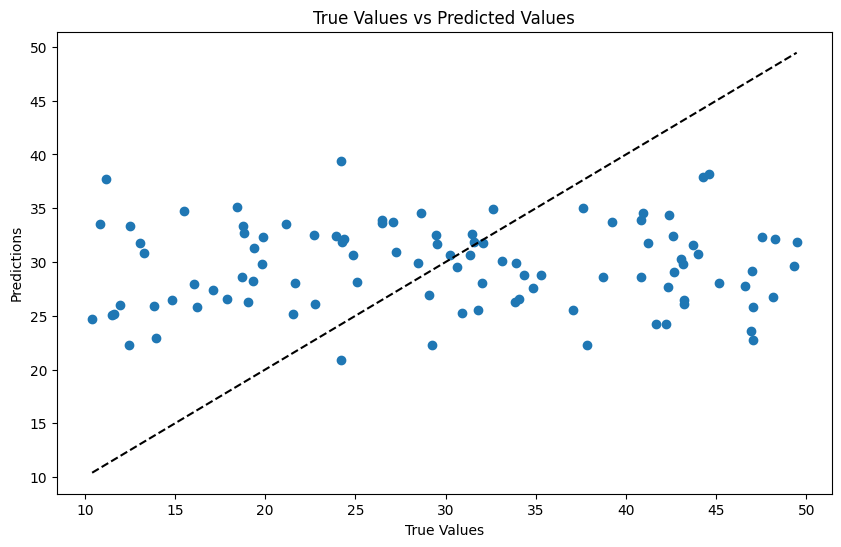

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

# Generate synthetic dataset for building features and energy efficiency ratings
np.random.seed(0)
data_size = 500
data = {
    'WallArea': np.random.randint(200, 400, data_size),
    'RoofArea': np.random.randint(100, 200, data_size),
    'OverallHeight': np.random.uniform(3, 10, data_size),
    'GlazingArea': np.random.uniform(0, 1, data_size),
    'EnergyEfficiency': np.random.uniform(10, 50, data_size)  # Energy efficiency rating
}
df = pd.DataFrame(data)

# Data preprocessing
X = df.drop('EnergyEfficiency', axis=1)
y = df['EnergyEfficiency']

# Visualize the relationships between features and the target variable (Energy Efficiency)
sns.pairplot(df, x_vars=['WallArea', 'RoofArea', 'OverallHeight', 'GlazingArea'], y_vars='EnergyEfficiency', height=4, aspect=1, kind='scatter')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Plot the True values vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

In [ ]:
#Agrupamiento de vehículos (aprendizaje no supervisado)

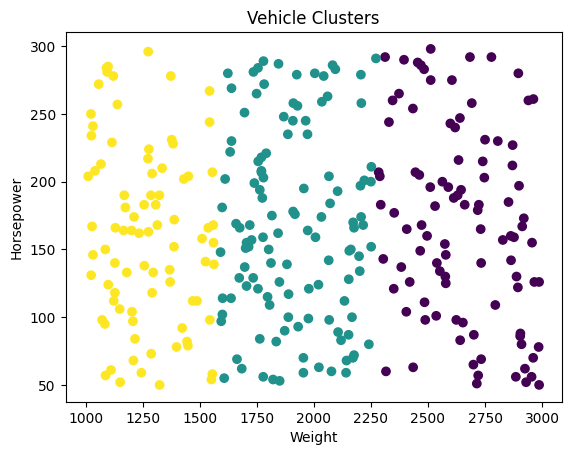

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

# Generate synthetic dataset for vehicles
np.random.seed(0)
data_size = 300
data = {
    'Weight': np.random.randint(1000, 3000, data_size),
    'EngineSize': np.random.uniform(1.0, 4.0, data_size),
    'Horsepower': np.random.randint(50, 300, data_size)
}
df = pd.DataFrame(data)

# No labels are needed for unsupervised learning
X = df

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Plotting the clusters
plt.scatter(df['Weight'], df['Horsepower'], c=kmeans.labels_)
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Vehicle Clusters')
plt.show()